In [52]:
print("All Libraries import")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

All Libraries import


In [53]:
# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
#  prices and the demand for clean air', J. Environ. Economics & Management,
#  vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
#  ...', Wiley, 1980.   N.B. Various transformations are used in the table on
#  pages 244-261 of the latter.

#  Variables in order:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 2a5,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV/price     Median value of owner-occupied homes in $1000's

# Load bouston house price prediction dataset...

In [54]:
dataset=pd.read_csv('dataset/BostonHousing.csv')

In [55]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [57]:
dataset.describe() #summarize the stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
## Check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [59]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219433,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311173,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394193,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091468,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302751,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240286,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.203507,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210718,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292794,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


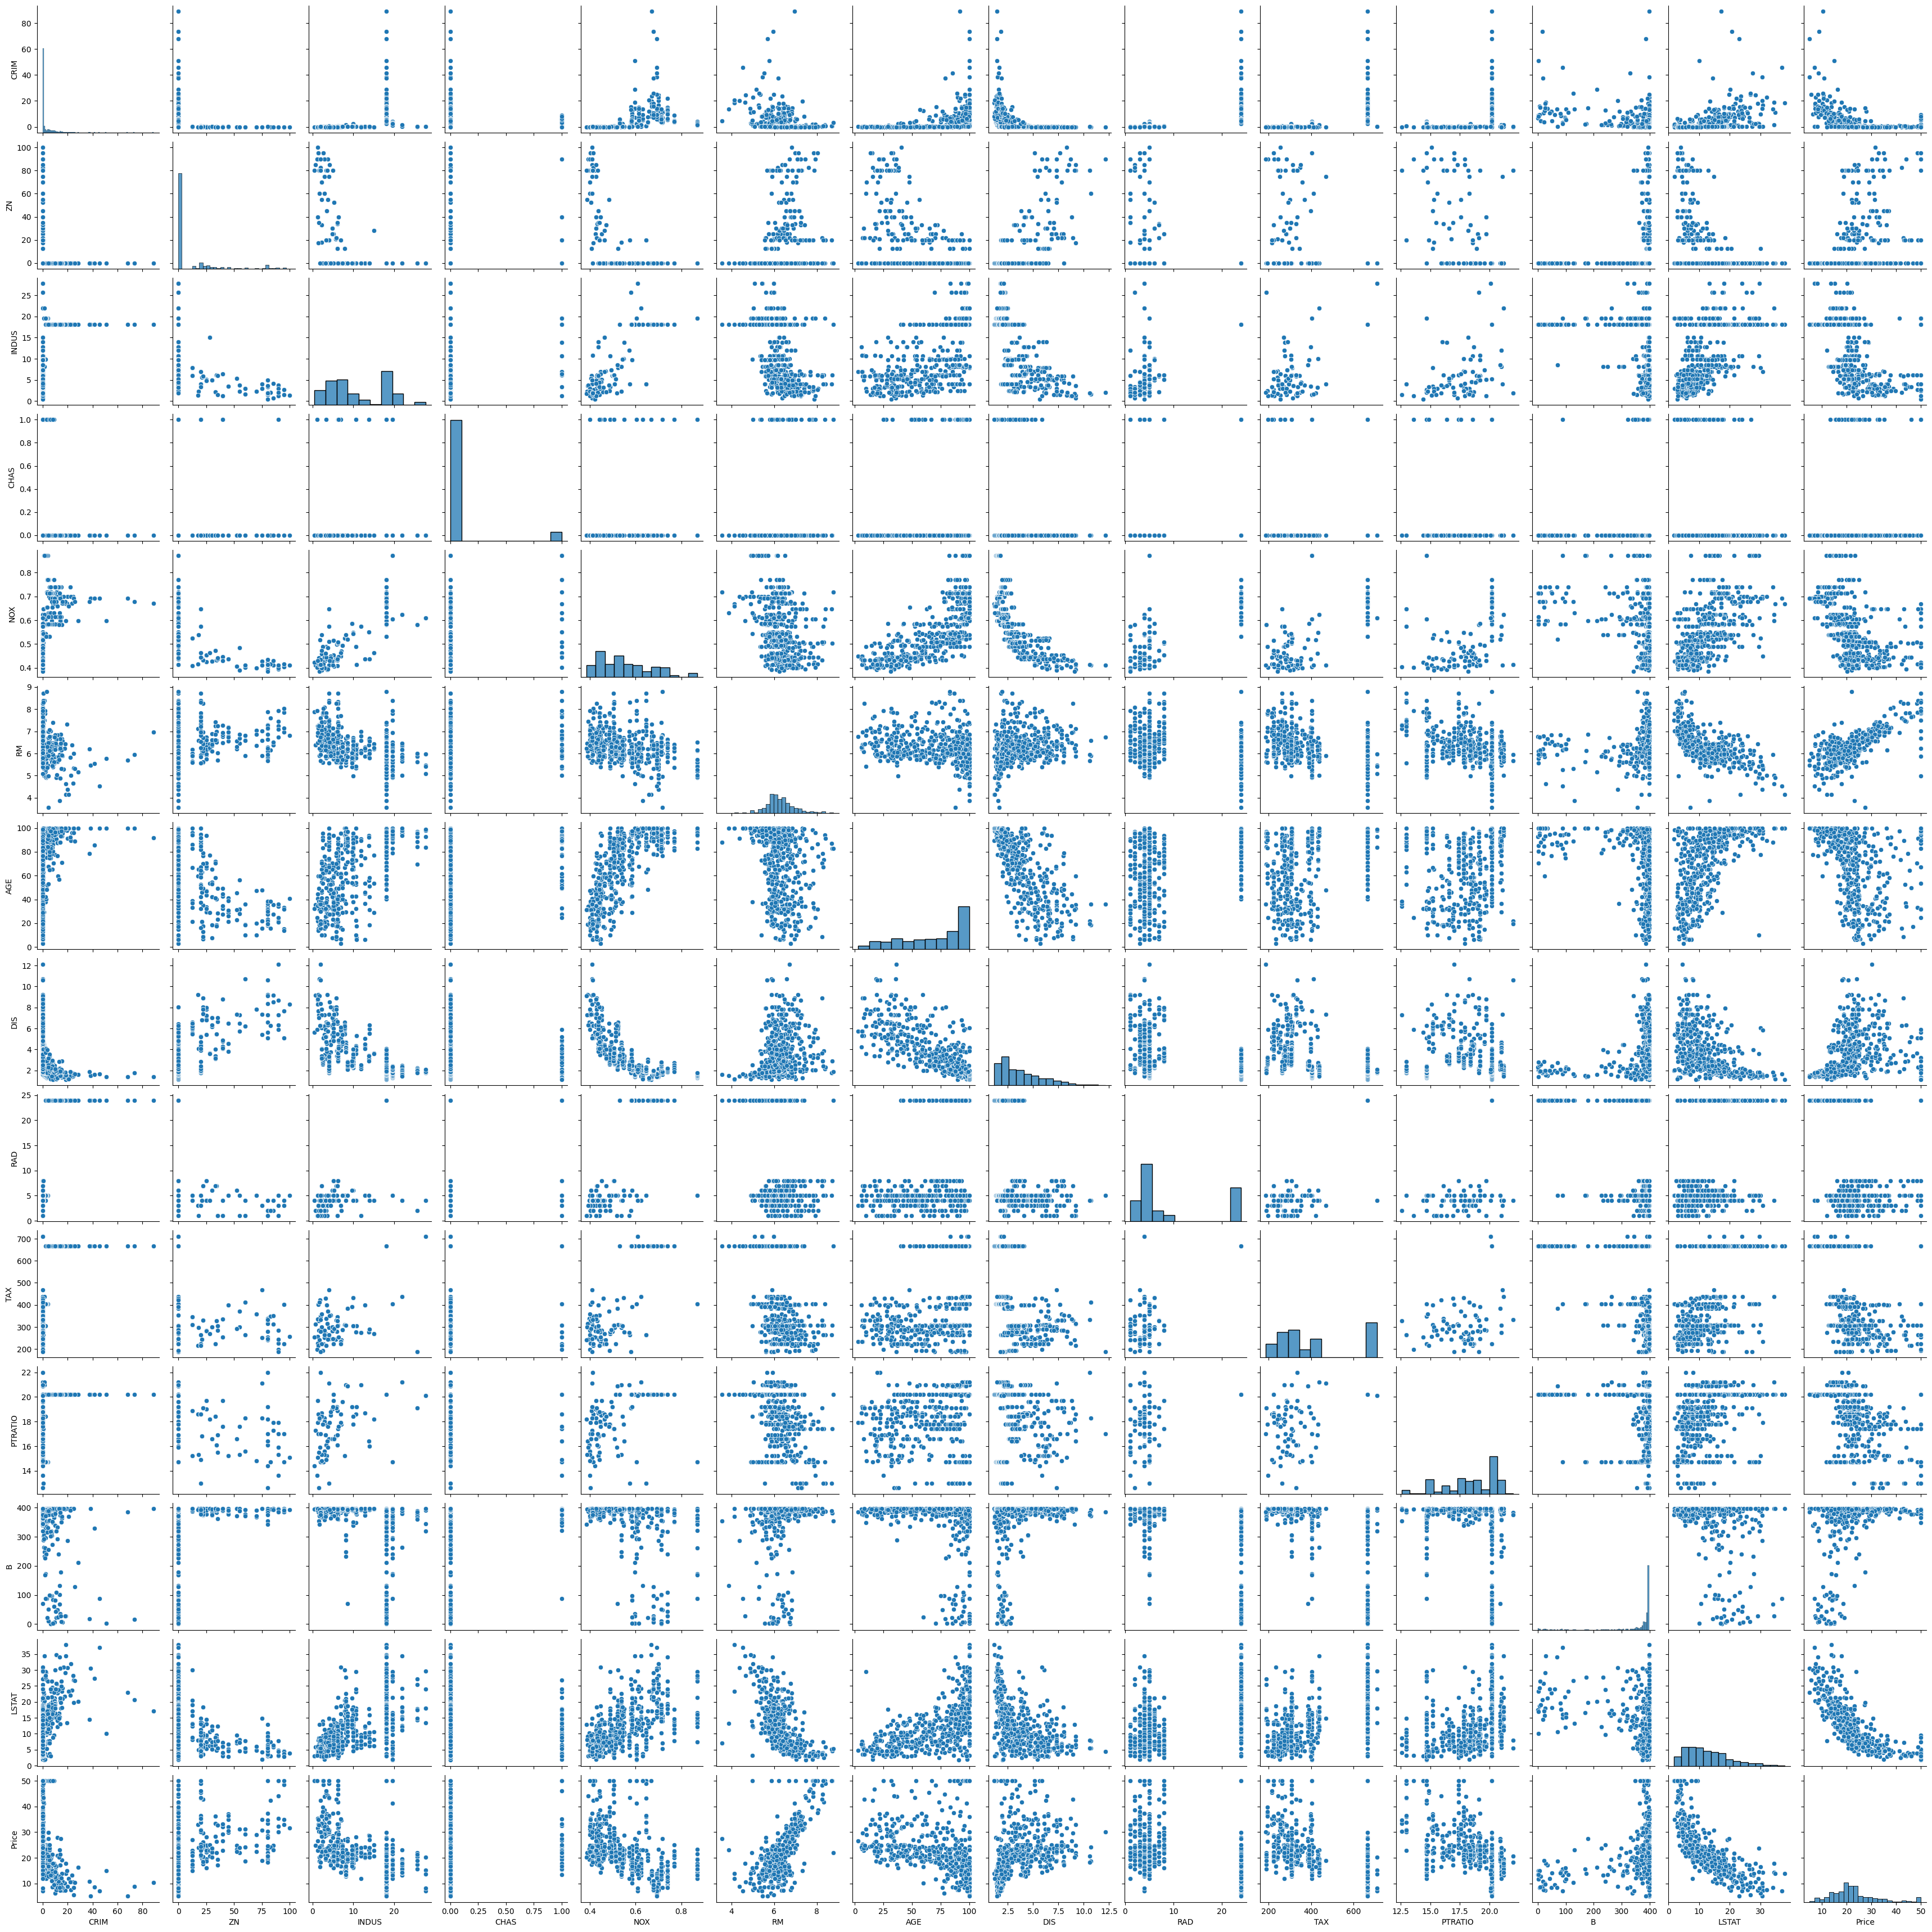

In [60]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'Price')

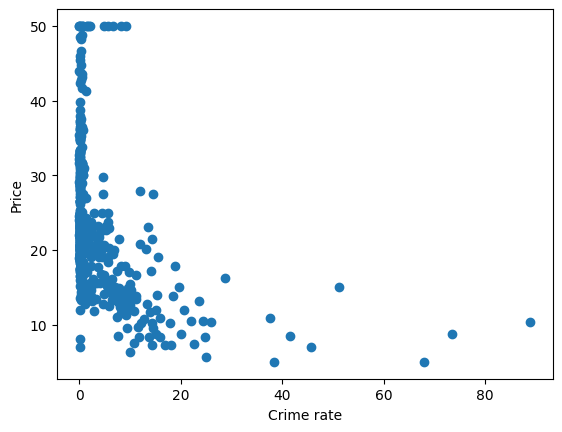

In [61]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

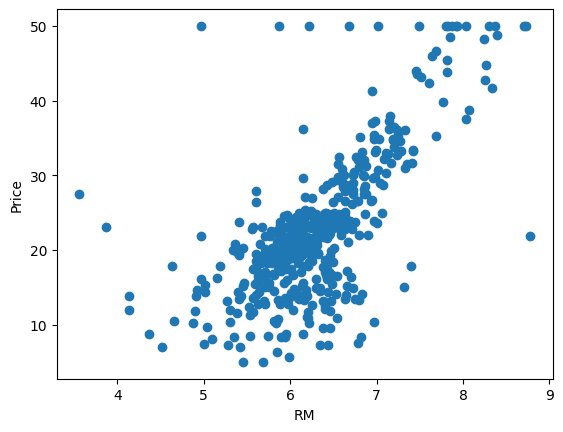

In [62]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='Price'>

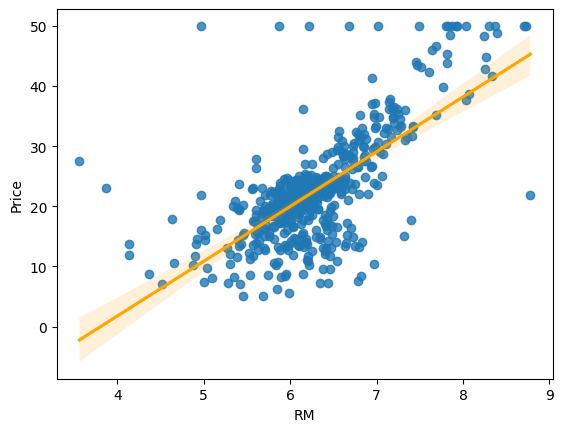

In [63]:
sns.regplot(x='RM',y='Price',data=dataset,line_kws={'color': 'orange'}) # positive correlation between price and Rm 

Text(0, 0.5, 'Price')

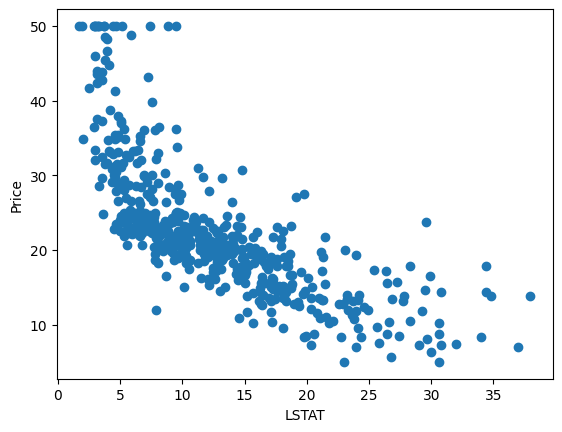

In [64]:
plt.scatter(dataset['LSTAT'],dataset['Price'])
plt.xlabel('LSTAT')
plt.ylabel('Price')

<Axes: xlabel='LSTAT', ylabel='Price'>

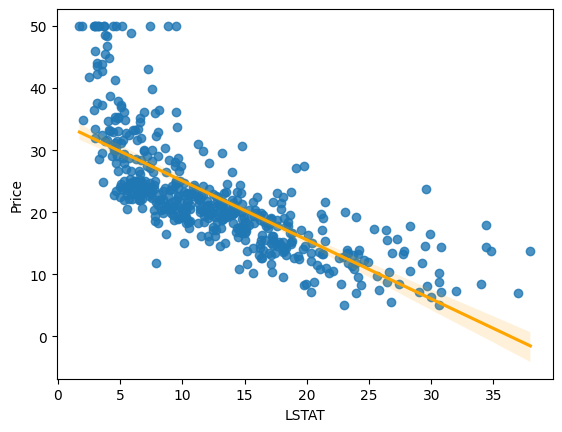

In [65]:
sns.regplot(x='LSTAT',y='Price',data=dataset,line_kws={'color':'orange'})

<Axes: xlabel='PTRATIO', ylabel='Price'>

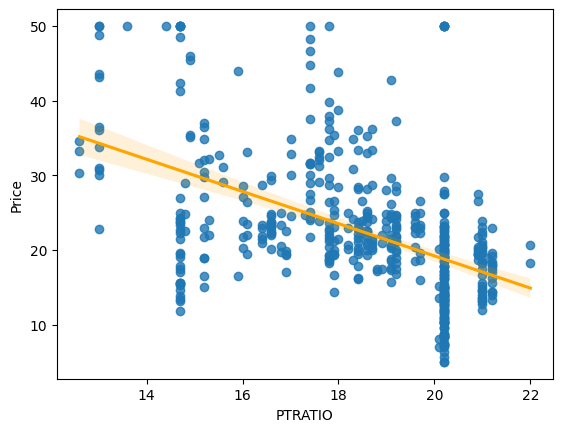

In [66]:
sns.regplot(x='PTRATIO',y='Price',data=dataset,line_kws={'color':'orange'})

In [67]:
#Independent and dpendent feature....
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [68]:
dataset['RM'] = dataset['RM'].fillna(dataset['RM'].median())

In [69]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [70]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [71]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [72]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [73]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [74]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
277,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,4.16
296,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4,289,16.0,392.85,7.39
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
460,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27
415,18.08460,0.0,18.10,0,0.679,6.434,100.0,1.8347,24,666,20.2,27.25,29.05
131,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.2,396.90,12.26
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88


In [75]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
278,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254,17.6,396.90,7.19
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,393.42,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.36894,22.0,5.86,0,0.431,8.259,8.4,8.9067,7,330,19.1,396.90,3.54
387,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63


In [76]:
#standardize the dataset..
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [77]:
X_train=scaler.fit_transform(X_train)

In [78]:
X_test=scaler.transform(X_test)

In [79]:
X_train

array([[-0.4160556 ,  1.26894002, -0.70350252, ..., -0.38349614,
         0.41306572, -1.18522843],
       [-0.41691109, -0.47275442,  0.40613894, ..., -1.10729558,
         0.40652824, -0.73815198],
       [ 1.19010544, -0.47275442,  1.02375563, ...,  0.79267796,
         0.45065624,  1.05153794],
       ...,
       [-0.28782609, -0.47275442,  1.5837478 , ...,  1.24505261,
         0.45065624, -0.06407697],
       [-0.38555482, -0.47275442, -0.73453111, ..., -0.47397107,
         0.23110582, -0.25508796],
       [-0.41567148,  2.57521084, -1.31964166, ..., -1.65014517,
         0.13838254, -1.07311328]])

In [80]:
X_test

array([[-0.41395823,  1.26894002, -0.70350252, ..., -0.38349614,
         0.45065624, -0.76583473],
       [-0.4215126 ,  3.44605806, -1.47035195, ..., -0.24778374,
         0.44008731, -1.09525948],
       [-0.38861192, -0.47275442, -0.56017999, ...,  0.52125317,
         0.45065624, -0.90978504],
       ...,
       [ 0.51159282, -0.47275442,  1.02375563, ...,  0.79267796,
         0.22151751,  0.55601668],
       [-0.36329167, -0.47275442, -0.73453111, ..., -0.47397107,
         0.28830878, -1.12017396],
       [-0.41955234, -0.47275442, -0.88376385, ...,  0.79267796,
         0.42788401, -0.29938036]])

In [81]:
y_train

277    33.1
296    27.1
401     7.2
460    16.4
193    31.1
       ... 
121    20.3
415     7.2
131    19.6
235    24.0
298    22.5
Name: Price, Length: 354, dtype: float64

## Model Training

In [82]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [83]:
## print the coeff and intercept
print(regression.coef_)

[-0.92418707  1.21773279 -0.0162418   0.62692387 -2.28042913  3.14392831
 -0.49009912 -3.50781677  2.2406375  -2.05198598 -2.33107938  0.72687407
 -2.73725273]


In [84]:
print(regression.intercept_)

22.516666666666666


In [85]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [86]:
### prediction with test data
reg_pred=regression.predict(X_test)

In [87]:
reg_pred

array([30.90302411, 31.23370701, 23.09584614, 20.44936443, 35.47481961,
       24.06710687, 31.02830931, 26.01047378, 17.59906624, 22.09590226,
       16.97555722, 16.39273143, 19.12943258, 25.55884938, 24.37733699,
       15.01729734, 45.83580446,  8.83521874, 24.93136397, 11.91846302,
       39.49113891, 23.04368093, 16.78239949, 18.98129712, 15.74435184,
       31.52566282, 10.71388716, 36.43516859, 18.89547441, 23.1285317 ,
       12.71488623, 32.20465895, 19.49349683, 20.92259161, 15.50271179,
       25.80988289, 14.77738913, 23.26410971, 24.41999105, 12.14198502,
       21.44229838, 15.76144207,  6.89358415, 17.05179601, 20.71256893,
       33.6549517 , 22.92451743, 17.80377443, 23.26462008, 36.43326575,
       23.80328128, 18.28082896, 16.64479804, 16.26019048, 25.8228984 ,
       21.1416164 , 28.51989959, 26.84613899, 20.81107873, 26.53216584,
       21.22259046, 28.26411141, 29.86128178, 19.21387661,  9.64861577,
       19.47798642, 23.39303292, 14.01696706, 20.83962688, 10.61

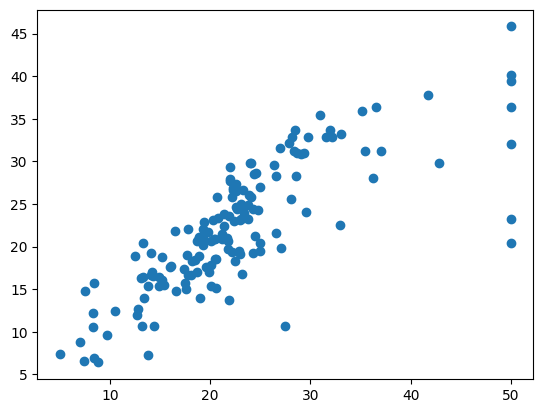

In [88]:
plt.scatter(y_test,reg_pred)

In [89]:
###Residuals
residuals=y_test-reg_pred

In [90]:
residuals

278    -1.803024
55      4.166293
326    -0.095846
377    -7.149364
263    -4.474820
         ...    
253    13.016979
387     0.885224
453    -4.243205
225     9.848200
337     0.049586
Name: Price, Length: 152, dtype: float64

In [91]:
###plot this residuals

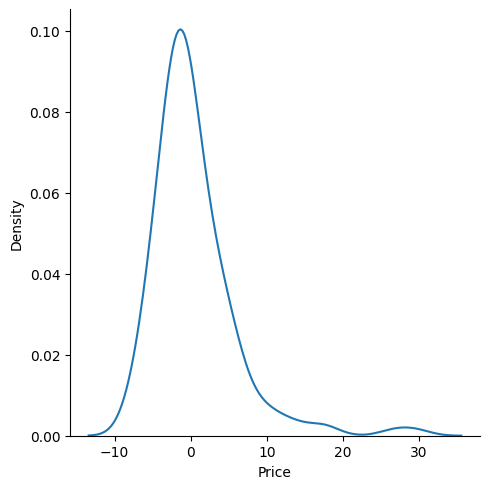

In [92]:
sns.displot(residuals,kind="kde")

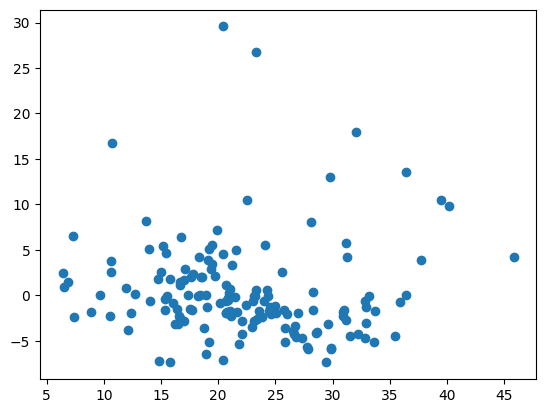

In [93]:
plt.scatter(reg_pred,residuals)
#uniform distribution

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.5819568137717734
29.910238118060857
5.46902533529155


## R sqaure and adjacent R sqaure

In [95]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6364775342363203


## Adjusted R2

In [96]:
# (1-\frac{(1-R^{2})(n-1)}{n-k-1}\)

In [97]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6022326642730751

## New Data Prediction

In [106]:
new_house.shape

(1, 13)

In [98]:
new_house = pd.DataFrame([{
    'CRIM': 0.02,
    'ZN': 18.0,
    'INDUS': 2.3,
    'CHAS': 0,
    'NOX': 0.54,
    'RM': 6.5,
    'AGE': 65.0,
    'DIS': 4.1,
    'RAD': 1,
    'TAX': 296,
    'PTRATIO': 15.3,
    'B': 390.0,
    'LSTAT': 4.98
}])

# prediction = pipe.predict(new_house)

In [107]:
regression.predict(new_house)

C:\Users\AA\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-353.61772807])

In [111]:
regression.predict(scaler.transform(new_house))

array([29.42449172])

## Pickle the model

In [99]:
import pickle

In [100]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [101]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [108]:
pickled_model.predict(scaler.transform(new_house))

array([29.42449172])